### Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from google.colab import drive
drive.mount('/drive')


import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Dropout, SimpleRNN, BatchNormalization

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error 

from keras.models import load_model
from keras.utils.vis_utils import plot_model


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


1. Оставляем строки в которых содержатся имена Data Science, Data Analytics, Data Engeneer, Python Developer
2. Сздаем столбец с соответствующим названием DS, DA, DE, PD
3. Колонку Skills Распарсим на 

### Функции

In [ ]:
def norm_cols(df, list_col):
  """
  Функция, которая нормализует данные путем деления колонки на максимальное значение
  на вход
  df - датасет
  list_col -  список колонок, которые необходимо нормализовать
  """
  for el in list_col:
    col_max = df[el].astype(float).max()
    df[el] = df [el].apply(lambda x: x/col_max)
  
  return df

In [ ]:
def listmerge(lstlst):
  """
  Функция, которая преобразует список списков в один общий список
  lstlst - список списков
  """
  all=[]
  for lst in lstlst:
    all.extend(lst)
  return all

In [ ]:
data_or = pd.read_csv('/drive/MyDrive/Final_Project/final_without_fill_na_salary (2).csv')

In [ ]:
data_or

,Employer,Name,Salary,From,To,Experience,Schedule,Skills,Description,Category,Position_level,Salary_median
0,Клевер Солюшнс,Backend Python Developer (middle/team lead),True,140000.0,200000.0,От 3 до 6 лет,Полный день,"Git,Redis,Django Framework,Базы данных,Python,...",Компания Qlever Solutions занимается разработк...,Python Develop,Middle,170000.0
1,FunBox,Python-разработчик,True,170000.0,210000.0,От 1 года до 3 лет,Полный день,"Python,Django,Git,Linux,Работа в команде",Вам предстоит участвовать в разработке сложных...,Python Develop,Middle,190000.0
2,Spark Equation,Data Scientist (Remote),True,120000.0,190000.0,От 3 до 6 лет,Удаленная работа,"Machine Learning,Python,Java,SQL,Data Mining,D...",Spark Equation is a software-enabled IT and st...,Data Science,other,155000.0
3,Vilesse,Разработчик Python,True,130500.0,174000.0,От 3 до 6 лет,Удаленная работа,"Python,CSS,JavaScript,React,Docker,Git,HTML5,D...",О нас:Мы - международная софтверная компания с...,Python Develop,other,152250.0
4,GetConduit.app,Разработчик Python Middle/Senior - Remote,True,186667.0,226667.0,От 3 до 6 лет,Удаленная работа,"Django Framework,Python,Git,PostgreSQL",Мы делаем аналитический продукт для e-commerce...,Python Develop,Middle,206667.0
...,...,...,...,...,...,...,...,...,...,...,...,...
960,DNS Головной офис,Data Engineer (Senior),True,200000.0,267625.0,От 3 до 6 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Senior,233812.5
961,DNS Головной офис,Data Engineer (Senior),True,200000.0,267625.0,От 3 до 6 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Senior,233812.5
962,DNS Головной офис,Data Engineer (Middle),True,100000.0,148750.0,От 1 года до 3 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Middle,124375.0
963,DNS Головной офис,Data Engineer (Middle),True,100000.0,148750.0,От 1 года до 3 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Middle,124375.0


In [ ]:
# Убираем дубликаты
# data = data_or.set_index('Ids')
data = data_or.drop_duplicates()
# data = data.reset_index()
data

,Employer,Name,Salary,From,To,Experience,Schedule,Skills,Description,Category,Position_level,Salary_median
0,Клевер Солюшнс,Backend Python Developer (middle/team lead),True,140000.0,200000.0,От 3 до 6 лет,Полный день,"Git,Redis,Django Framework,Базы данных,Python,...",Компания Qlever Solutions занимается разработк...,Python Develop,Middle,170000.0
1,FunBox,Python-разработчик,True,170000.0,210000.0,От 1 года до 3 лет,Полный день,"Python,Django,Git,Linux,Работа в команде",Вам предстоит участвовать в разработке сложных...,Python Develop,Middle,190000.0
2,Spark Equation,Data Scientist (Remote),True,120000.0,190000.0,От 3 до 6 лет,Удаленная работа,"Machine Learning,Python,Java,SQL,Data Mining,D...",Spark Equation is a software-enabled IT and st...,Data Science,other,155000.0
3,Vilesse,Разработчик Python,True,130500.0,174000.0,От 3 до 6 лет,Удаленная работа,"Python,CSS,JavaScript,React,Docker,Git,HTML5,D...",О нас:Мы - международная софтверная компания с...,Python Develop,other,152250.0
4,GetConduit.app,Разработчик Python Middle/Senior - Remote,True,186667.0,226667.0,От 3 до 6 лет,Удаленная работа,"Django Framework,Python,Git,PostgreSQL",Мы делаем аналитический продукт для e-commerce...,Python Develop,Middle,206667.0
...,...,...,...,...,...,...,...,...,...,...,...,...
960,DNS Головной офис,Data Engineer (Senior),True,200000.0,267625.0,От 3 до 6 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Senior,233812.5
961,DNS Головной офис,Data Engineer (Senior),True,200000.0,267625.0,От 3 до 6 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Senior,233812.5
962,DNS Головной офис,Data Engineer (Middle),True,100000.0,148750.0,От 1 года до 3 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Middle,124375.0
963,DNS Головной офис,Data Engineer (Middle),True,100000.0,148750.0,От 1 года до 3 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Middle,124375.0


### Размножение датасета

Поскольку в нашем примере мало данных мы попробуем перемешать столбцы по группам чтобы получить наиболее разнообразные данные

In [ ]:
df_copy = data_or.copy()

In [ ]:
lst_prof = data['Category'].unique()
lst_prof

array(['Python Develop', 'Data Science', 'Data Analysis', 'Data Engineer'],
      dtype=object)

In [ ]:
lst_posit = data['Position_level'].unique()
lst_posit

array(['Middle', 'other', 'Junior', 'Senior', 'Lead'], dtype=object)

In [ ]:
lst_shuf_col = ['Experience', 'Salary_median']

In [ ]:
for el in lst_prof:
  data_shuff = data[data["Category"] == el]
  data_shuff = data_shuff.reset_index()
  for pos in lst_posit:
    data_shuff = data_shuff[data_shuff["Position_level"] == pos]
    
    for col in lst_shuf_col:
      col_data = data_shuff[col].sample(frac=1)
      col_data = col_data.reset_index()

      data_shuff_1 = data_shuff.merge(col_data[col], how='inner')
      df_copy = pd.concat([df_copy, data_shuff_1], ignore_index=True, axis=0)
      if col in  data_shuff_1.columns:
        data_shuff_1 = data_shuff_1.drop(col, axis=1)




In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy

,Employer,Name,Salary,From,To,Experience,Schedule,Skills,Description,Category,Position_level,Salary_median,index
0,Клевер Солюшнс,Backend Python Developer (middle/team lead),True,140000.0,200000.0,От 3 до 6 лет,Полный день,"Git,Redis,Django Framework,Базы данных,Python,...",Компания Qlever Solutions занимается разработк...,Python Develop,Middle,170000.0,NaN
1,FunBox,Python-разработчик,True,170000.0,210000.0,От 1 года до 3 лет,Полный день,"Python,Django,Git,Linux,Работа в команде",Вам предстоит участвовать в разработке сложных...,Python Develop,Middle,190000.0,NaN
2,Spark Equation,Data Scientist (Remote),True,120000.0,190000.0,От 3 до 6 лет,Удаленная работа,"Machine Learning,Python,Java,SQL,Data Mining,D...",Spark Equation is a software-enabled IT and st...,Data Science,other,155000.0,NaN
3,Vilesse,Разработчик Python,True,130500.0,174000.0,От 3 до 6 лет,Удаленная работа,"Python,CSS,JavaScript,React,Docker,Git,HTML5,D...",О нас:Мы - международная софтверная компания с...,Python Develop,other,152250.0,NaN
4,GetConduit.app,Разработчик Python Middle/Senior - Remote,True,186667.0,226667.0,От 3 до 6 лет,Удаленная работа,"Django Framework,Python,Git,PostgreSQL",Мы делаем аналитический продукт для e-commerce...,Python Develop,Middle,206667.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63947,Сеть Партнерств,Data engineer,True,200000.0,248750.0,От 1 года до 3 лет,Гибкий график,"Python,SQL,PostgreSQL,Tableau,Docker","«Сеть партнерств» – ИТ компания, мы создаем и ...",Data Engineer,Middle,224375.0,940.0
64001,Точка,Data Engineer,True,331250.0,380000.0,От 1 года до 3 лет,Полный день,"SQL,Oracle Pl/SQL,ETL,DWH",Ищем способного программиста в команду BI. Ц...,Data Engineer,Middle,355625.0,941.0
64055,Автономная некоммерческая организация Московск...,Data-инженер,True,200000.0,220000.0,От 1 года до 3 лет,Полный день,"Python,Hadoop,SQL,ETL,Умение принимать решения",Обязанности: Разрабатывать надежные pipeline...,Data Engineer,Middle,210000.0,959.0
64109,DNS Головной офис,Data Engineer (Middle),True,100000.0,148750.0,От 1 года до 3 лет,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,Middle,124375.0,962.0


In [ ]:
# df_copy.drop(['Ids', 'index'], axis=1, inplace=True)
df_copy.drop(['index'], axis=1, inplace=True)

In [ ]:
data = df_copy

In [ ]:
# Найдем все значения skills и создадим для каждого отдельный столбец, все значения пока заполним 0
list_str = data['Skills'].str.split(',').tolist()

all_str_lst = []
all_str_lst = listmerge(list_str)
all_str_lst = list(set(all_str_lst))

data[all_str_lst] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


In [ ]:
# Заполенние поля  Experience
data['Experience'].unique()

array(['От 3 до 6 лет', 'От 1 года до 3 лет', 'Нет опыта', 'Более 6 лет'],
      dtype=object)

In [ ]:
# Заполенние поля  Experience
data.loc[data['Experience'] == 'Нет опыта', 'Experience'] = 0
data.loc[data['Experience'] == 'От 1 года до 3 лет', 'Experience'] = 1/6
data.loc[data['Experience'] == 'От 3 до 6 лет', 'Experience'] = 3/6
data.loc[data['Experience'] == 'Более 6 лет', 'Experience'] = 1
# Заполенние поля  Salary_median
data = norm_cols(data, ['Salary_median'])



In [ ]:
#Заполним поля единицами, в которых присутствует необходимый навык
for idx in data.index:
  skills_list = data.at[idx, 'Skills'].split(',')
  for el in skills_list:
    if el in all_str_lst:
      data.loc[idx, el] = 1

In [ ]:
# Закодируем категориальные признаки
cat_features = ['Schedule', 'Position_level']
X = pd.get_dummies(data[cat_features], drop_first=True)

In [ ]:
data

,Employer,Name,Salary,From,To,Experience,Schedule,Skills,Description,Category,...,Алгоритмы,JSON API,Airflow,PHP,data science,Pandas,HTTP,Computer Vision,Apache Airflow,Aiohttp
0,Клевер Солюшнс,Backend Python Developer (middle/team lead),True,140000.0,200000.0,0.5,Полный день,"Git,Redis,Django Framework,Базы данных,Python,...",Компания Qlever Solutions занимается разработк...,Python Develop,...,0,0,0,0,0,0,0,0,0,0
1,FunBox,Python-разработчик,True,170000.0,210000.0,0.166667,Полный день,"Python,Django,Git,Linux,Работа в команде",Вам предстоит участвовать в разработке сложных...,Python Develop,...,0,0,0,0,0,0,0,0,0,0
2,Spark Equation,Data Scientist (Remote),True,120000.0,190000.0,0.5,Удаленная работа,"Machine Learning,Python,Java,SQL,Data Mining,D...",Spark Equation is a software-enabled IT and st...,Data Science,...,0,0,0,0,0,0,0,0,0,0
3,Vilesse,Разработчик Python,True,130500.0,174000.0,0.5,Удаленная работа,"Python,CSS,JavaScript,React,Docker,Git,HTML5,D...",О нас:Мы - международная софтверная компания с...,Python Develop,...,0,0,0,0,0,0,0,0,0,0
4,GetConduit.app,Разработчик Python Middle/Senior - Remote,True,186667.0,226667.0,0.5,Удаленная работа,"Django Framework,Python,Git,PostgreSQL",Мы делаем аналитический продукт для e-commerce...,Python Develop,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63947,Сеть Партнерств,Data engineer,True,200000.0,248750.0,0.166667,Гибкий график,"Python,SQL,PostgreSQL,Tableau,Docker","«Сеть партнерств» – ИТ компания, мы создаем и ...",Data Engineer,...,0,0,0,0,0,0,0,0,0,0
64001,Точка,Data Engineer,True,331250.0,380000.0,0.166667,Полный день,"SQL,Oracle Pl/SQL,ETL,DWH",Ищем способного программиста в команду BI. Ц...,Data Engineer,...,0,0,0,0,0,0,0,0,0,0
64055,Автономная некоммерческая организация Московск...,Data-инженер,True,200000.0,220000.0,0.166667,Полный день,"Python,Hadoop,SQL,ETL,Умение принимать решения",Обязанности: Разрабатывать надежные pipeline...,Data Engineer,...,0,0,0,0,0,0,0,0,0,0
64109,DNS Головной офис,Data Engineer (Middle),True,100000.0,148750.0,0.166667,Полный день,"Linux,Bash,Docker,MS SQL,PostgreSQL,Big Data,D...",В компании DNS активно развивается аналитическ...,Data Engineer,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# присоединим признаки к датасету
data= data.join(X, how='inner')

In [ ]:
target = data['Category']

In [ ]:
# Обозначим таргет для модели классификации
target_class = pd.get_dummies(data['Category'], drop_first=False)

In [ ]:
# Обозначим датасет для модели классификации
df_drop_class = data.drop(['Employer', 'Name', 'Salary',  'Name', 'Schedule', 'Skills', 'Description', 'Category', 'From', 'To', 'Position_level'], axis=1)

In [ ]:
df_drop_class

,Experience,Salary_median,FastAPI,jQuery,Docker,Google Docs,Gitlab,Analytical skills,Excel,TensorFlow,...,Computer Vision,Apache Airflow,Aiohttp,Schedule_Полный день,Schedule_Сменный график,Schedule_Удаленная работа,Position_level_Lead,Position_level_Middle,Position_level_Senior,Position_level_other
0,0.5,0.141667,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.166667,0.158333,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.5,0.129167,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.5,0.126875,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.5,0.172223,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63947,0.166667,0.186979,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
64001,0.166667,0.296354,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
64055,0.166667,0.175000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
64109,0.166667,0.103646,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Переведем таргет и датасет в numpy arr и в тип float 32
df_drop_class_np = np.asarray(df_drop_class).astype('float32')
target_class_np = np.asarray(target_class).astype('float32')

In [ ]:
# Разобьем датасет на тестовую и тренировочеую выборки

X_train, X_test, y_train, y_test = train_test_split(df_drop_class_np, target_class_np, test_size=0.1, random_state=42)

### Построение модели классификации

In [ ]:
# model = keras.Sequential()

# model.add(keras.layers.Dense(units=2, activation='relu'))
# # model.add(BatchNormalization())
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dropout(0.5))



# model.add(keras.layers.Dense(units=4, activation='softmax'))


# model.compile(loss= tf.keras.losses.CategoricalCrossentropy(
#                              from_logits=False,
#                              label_smoothing=0.0,
#                              axis=-1,
#                              reduction="auto",
#                              name="categorical_crossentropy"), 
#               optimizer=tf.keras.optimizers.Adam(
#                             learning_rate=0.00001,
#                             beta_1=0.9,
#                             beta_2=0.999,
#                             epsilon=1e-07,
#                             amsgrad=False), 
#               metrics='acc')

# fit_results = model.fit(x=X_train, y=y_train, epochs=1000, validation_split=0.3)

# Аккьюрси 0,76

In [ ]:
# model = keras.Sequential()

# model.add(keras.layers.Dense(units=2, activation='relu'))
# # model.add(BatchNormalization())
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# # model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(units=256, activation='relu'))
# model.add(keras.layers.Dense(units=256, activation='relu'))
# # model.add(keras.layers.Dropout(0.3))



# model.add(keras.layers.Dense(units=4, activation='softmax'))


# model.compile(loss= tf.keras.losses.CategoricalCrossentropy(
#                              from_logits=False,
#                              label_smoothing=0.0,
#                              axis=-1,
#                              reduction="auto",
#                              name="categorical_crossentropy"), 
#               optimizer=tf.keras.optimizers.Adam(
#                             learning_rate=0.0001,
#                             beta_1=0.9,
#                             beta_2=0.999,
#                             epsilon=1e-07,
#                             amsgrad=False), 
#               metrics='acc')

# fit_results = model.fit(x=X_train, y=y_train, epochs=100, validation_split=0.3)

# асс 0,72

In [ ]:
#Для датасета final_without_fill_na_salary.csv
# acc 0.92

model = keras.Sequential()

# model.add(keras.layers.Dense(units=16, activation='relu'))
# # model.add(BatchNormalization())
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# # model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(units=256, activation='relu'))
# model.add(keras.layers.Dense(units=256, activation='relu'))
# # model.add(keras.layers.Dropout(0.3))


# model.add(keras.layers.Dense(units=4, activation='softmax'))


# model.compile(loss= tf.keras.losses.CategoricalCrossentropy(
#                              from_logits=False,
#                              label_smoothing=0.0,
#                              axis=-1,
#                              reduction="auto",
#                              name="categorical_crossentropy"), 
#               optimizer=tf.keras.optimizers.Adam(
#                             learning_rate=0.0001,
#                             beta_1=0.9,
#                             beta_2=0.999,
#                             epsilon=1e-07,
#                             amsgrad=False), 
#               metrics='acc')

# fit_results = model.fit(x=X_train, y=y_train, epochs=150, validation_split=0.2)

In [ ]:
# model = keras.Sequential()

# model.add(keras.layers.Dense(units=16, activation='relu'))
# # model.add(BatchNormalization())
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(units=256, activation='relu'))
# model.add(keras.layers.Dense(units=256, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(units=512, activation='relu'))
# model.add(keras.layers.Dense(units=512, activation='relu'))
# # model.add(keras.layers.Dropout(0.1))
# # model.add(keras.layers.Dense(units=512, activation='relu'))
# # model.add(keras.layers.Dense(units=512, activation='relu'))


# model.add(keras.layers.Dense(units=4, activation='softmax'))


# model.compile(loss= tf.keras.losses.CategoricalCrossentropy(
#                              from_logits=False,
#                              label_smoothing=0.0,
#                              axis=-1,
#                              reduction="auto",
#                              name="categorical_crossentropy"), 
#               optimizer=tf.keras.optimizers.Adam(
#                             learning_rate=0.0001,
#                             beta_1=0.9,
#                             beta_2=0.999,
#                             epsilon=1e-07,
#                             amsgrad=False), 
#               metrics='acc')

# fit_results = model.fit(x=X_train, y=y_train, epochs=250, validation_split=0.1, batch_size=24)

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Dense(units=16, activation='relu'))
# model.add(BatchNormalization())
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=124, activation='relu'))
model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(units=512, activation='relu'))
# model.add(keras.layers.Dense(units=512, activation='relu'))


model.add(keras.layers.Dense(units=4, activation='softmax'))


model.compile(loss= tf.keras.losses.CategoricalCrossentropy(
                             from_logits=False,
                             label_smoothing=0.0,
                             axis=-1,
                             reduction="auto",
                             name="categorical_crossentropy"), 
              optimizer=tf.keras.optimizers.Adam(
                            learning_rate=0.0001,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-07,
                            amsgrad=False), 
              metrics='acc')

fit_results = model.fit(x=X_train, y=y_train, epochs=250, validation_split=0.1, batch_size=24)

Epoch 1/250
49/49 [==============================] - 3s 16ms/step - loss: 1.2646 - acc: 0.5123 - val_loss: 1.1450 - val_acc: 0.5038
Epoch 2/250
49/49 [==============================] - 1s 11ms/step - loss: 1.1408 - acc: 0.5311 - val_loss: 1.1074 - val_acc: 0.5038
Epoch 3/250
49/49 [==============================] - 1s 11ms/step - loss: 1.0865 - acc: 0.5311 - val_loss: 1.0607 - val_acc: 0.5038
Epoch 4/250
49/49 [==============================] - 1s 12ms/step - loss: 1.0272 - acc: 0.5319 - val_loss: 0.9797 - val_acc: 0.5191
Epoch 5/250
49/49 [==============================] - 1s 12ms/step - loss: 0.9517 - acc: 0.5694 - val_loss: 0.8991 - val_acc: 0.6183
Epoch 6/250
49/49 [==============================] - 1s 11ms/step - loss: 0.9172 - acc: 0.6332 - val_loss: 0.8877 - val_acc: 0.6718
Epoch 7/250
49/49 [==============================] - 1s 11ms/step - loss: 0.8928 - acc: 0.6536 - val_loss: 0.8576 - val_acc: 0.6718
Epoch 8/250
49/49 [==============================] - 1s 20ms/step - loss: 0.

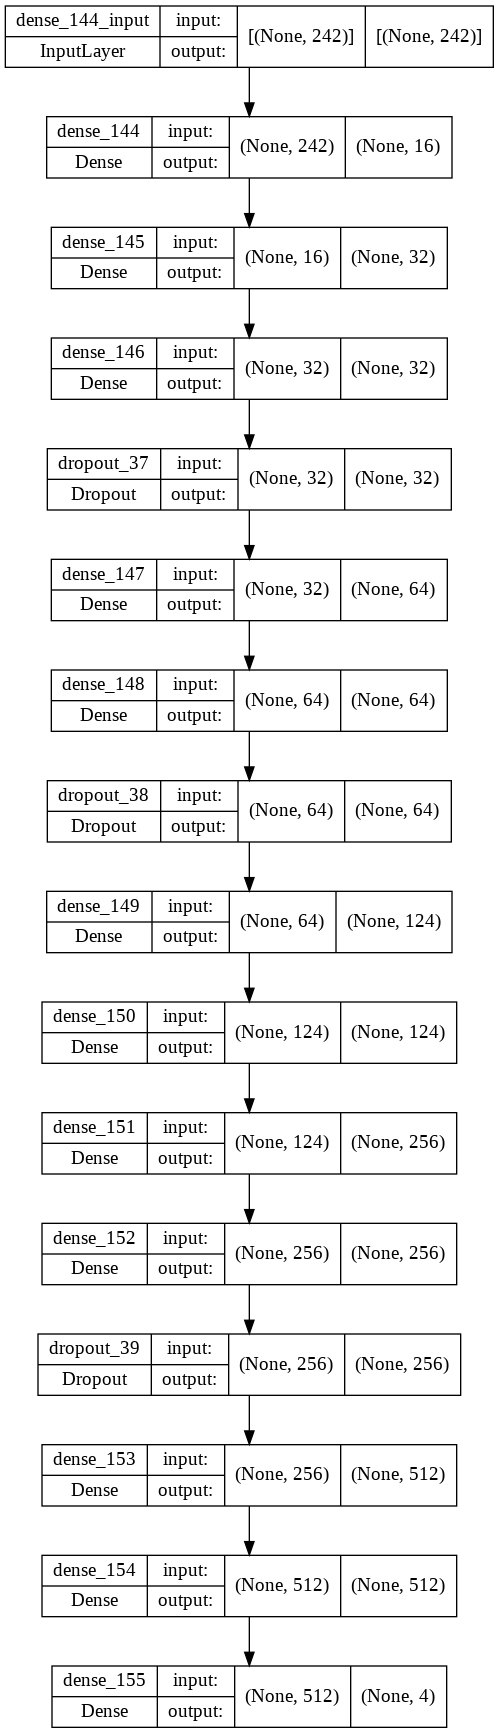

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save('my_model_classification.h5')

<function matplotlib.pyplot.legend>

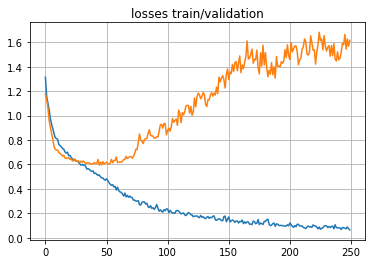

In [ ]:
# График для функции потерь
plt.title('losses train/validation')
plt.plot(fit_results.history['loss'], label="Train")
plt.plot(fit_results.history['val_loss'], label="Validation")
plt.grid()
plt.legend

<function matplotlib.pyplot.legend>

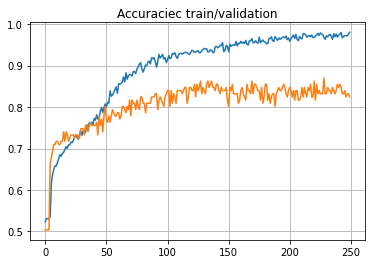

In [ ]:
# График точности модели
plt.title('Accuraciec train/validation')
plt.plot(fit_results.history['acc'], label="Train")
plt.plot(fit_results.history['val_acc'], label="Validation")
plt.grid()
plt.legend

In [ ]:
predicted_test = model.predict(X_test)
y_pred = np.argmax(predicted_test, axis=1)

In [ ]:
accuracy_score(y_test, y_pred)

0.8287671232876712

In [ ]:
y_test = np.argmax(y_test, axis=1)
# len(y_test)

In [ ]:
# y_test

In [ ]:
# predicted_test

In [ ]:

# len(y_pred)
# y_pred

In [ ]:
# y_test

In [ ]:
# X_test[1]

### Построение модели регрессии

In [ ]:
target_regres = data['Salary_median']
target_regres

In [ ]:
df_drop_regres = data.drop(['Employer', 'Name', 'Salary',  'Name', 'Schedule', 'Skills', 'Description', 'Category', 'From', 'To', 'Position_level', 'Salary_median'], axis=1)

In [ ]:
target_regres_np = np.asarray(target_regres).astype('float32')
df_drop_regres_np = np.asarray(df_drop_regres).astype('float32')

In [ ]:
df_drop_regres

In [ ]:
df_drop_regres_np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_drop_regres_np, target_regres_np, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
# model.add(BatchNormalization())
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dense(units=32, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dense(units=124, activation='relu'))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(units=256, activation='relu'))
# model.add(keras.layers.Dense(units=256, activation='relu'))
# model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(units=1, activation='sigmoid'))


model.compile(loss= 'mse', 
              optimizer=tf.keras.optimizers.Adam(
                            learning_rate=0.001,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-07,
                            amsgrad=False), 
              metrics='mae')

fit_results = model.fit(x=X_train, y=y_train, epochs=100, validation_split=0.2, batch_size=32)

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
predicted_test = model.predict(X_test)

In [ ]:
y_pred = predicted_test

In [ ]:
len(y_test)

In [ ]:
len(y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
y_test[1]

In [ ]:
data.iloc[1]

In [ ]:
test_x_1 = df_drop_regres.iloc[[0,1,2,3,4]]

test_x_1 = np.asarray(test_x_1).astype('float32')
test_x_1.shape

In [ ]:
model.predict(test_x_1)

In [ ]:
target_regres

In [ ]:
0.14226848 * data_or["Salary_median"].max()

In [ ]:
data_or.loc[4, "Salary_median"]